In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df = df.dropna(subset=["Years of Experience", "Salary"])
df = df[np.isfinite(df["Years of Experience"])]

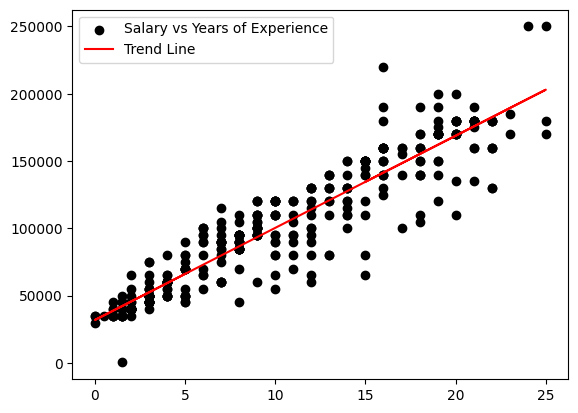

In [6]:
unique_x = df["Years of Experience"]
y = df["Salary"]

plt.scatter(unique_x, y, color="Black", label="Salary vs Years of Experience")

slope, intercept = np.polyfit(unique_x, y, 1)

trend_line = slope * unique_x + intercept
plt.plot(unique_x, trend_line, color='red', label='Trend Line')

# Show the plot
plt.legend()
plt.show()

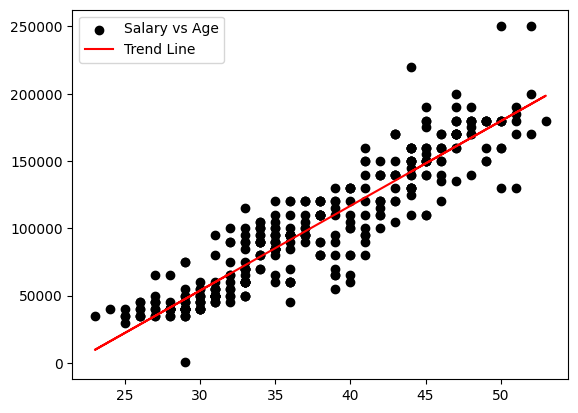

In [7]:
unique_x = df["Age"]
y = df["Salary"]

plt.scatter(unique_x, y, color="Black", label="Salary vs Age")

slope, intercept = np.polyfit(unique_x, y, 1)

trend_line = slope * unique_x + intercept
plt.plot(unique_x, trend_line, color='red', label='Trend Line')

# Show the plot
plt.legend()
plt.show()

In [8]:
import seaborn as sns

In [9]:
df_sorted = df.sort_values("Salary", ascending=True)

### Utbildning av bästa tjänarna & antalet

In [10]:
df_sorted = df.sort_values("Salary", ascending=False)
df_sorted.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
4,52.0,Male,Master's,Director,20.0,200000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0


### Education x Salary

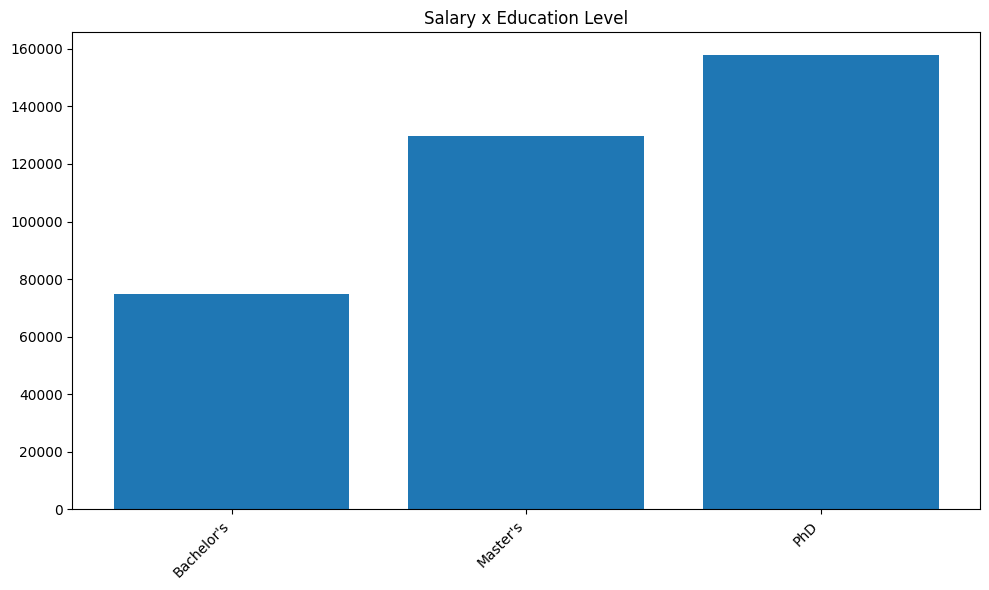

In [11]:
df_edu = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=True)

x = df_edu

plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(x.index, x.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees, and align to the right

# Add a title
plt.title('Salary x Education Level')

# Show the chart
plt.tight_layout()  # This makes sure the labels fit properly
plt.show()

                    Avg_Salary  Count
Education Level                      
Bachelor's       215000.000000      2
Master's         177647.058824     34
PhD              184642.857143     14


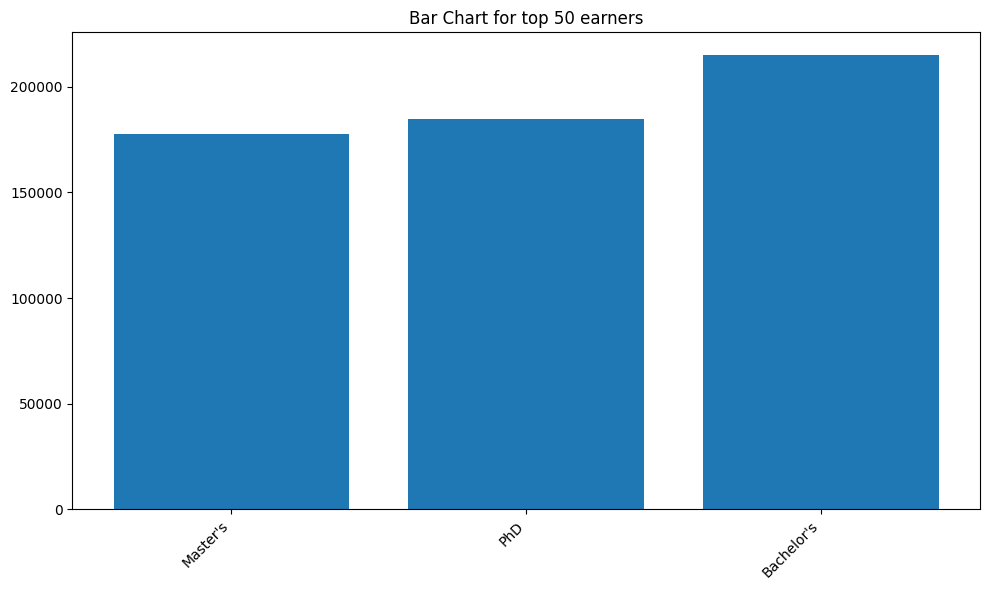

In [13]:
df_edu = df_sorted[:50].groupby('Education Level')['Salary'].mean().sort_values(ascending=True)

x = df_edu

# Grouped summary: Average salary and count of people
summary = df_sorted[:50].groupby('Education Level').agg(Avg_Salary=('Salary', 'mean'), Count=('Education Level', 'count'))
print(summary)

plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(x.index, x.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees, and align to the right

# Add a title
plt.title('Bar Chart for top 50 earners')

# Show the chart
plt.tight_layout()  # This makes sure the labels fit properly
plt.show()